In [4]:
import os
print(os.getcwd())
import matplotlib.pyplot as plt
import re
import string
import pandas as pd
import glob
from textblob import Word
from nltk.stem import SnowballStemmer
stemmer_english = SnowballStemmer('english')
from wordcloud import WordCloud 
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

C:\Users\mukes\Documents\Datascience\Dessertation Related\Data


In [17]:
#os.chdir('C:/Users/mukes/Documents/Datascience/Dessertation Related/Data/Fasiontweets') 

In [5]:
path = r'C:\Users\mukes\Documents\Datascience\Dessertation Related\Data\Fasiontweets' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,encoding="ISO-8859-1")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
df1 = frame[['screen_name', 'text']]

In [7]:
df1.text[15]

'<U+0001F381><U+0001F3A4> \r\nGreat Discounts On Best Fashion Collection <U+0001F38A><U+0001F3A4> \r\nIn Addition To Awesome Promo Coupon <U+0001F388><U+0001F3A4> From Bath&amp;Body Website <U+0001F4AA>\r\n<U+2B50> Use Discount Coupon\r\n\r\nOK3  <U+2B50>\r\n\r\nBW808  <U+0001F6D2>\r\n\r\nOK5  <U+0001F534>\r\n\r\n<U+0643><U+0648><U+062F> <U+062E><U+0635><U+0645> <U+0628><U+0627><U+062B> <U+0627><U+0646><U+062F> <U+0628><U+0648><U+062F><U+064A> https://t.co/bAu6cb96Me'

In [8]:
import nltk

### Exploring Twitter data

In [9]:
df1['word_count'] = df1['text'].apply(lambda x: len(str(x).split(" ")))
df1[['text','word_count']]

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,word_count
0,"Welcome @EliManning, In typical fashion, you n...",16
1,Id feel bad about this if Scarborough hadnt ...,21
2,.@ygofficialblink's Lisa Manoban is fast becom...,14
3,"At just 24-year-old, Harris Reed has already d...",12
4,Take some time to pore over and escape via the...,28
...,...,...
216072,6ix9ine Be like you big madð\n\n#diamond #j...,16
216073,#doglover #catlover Fashion Pet Cat Costume ht...,7
216074,my DREAM is to go to fashion school but i cant...,14
216075,Visit specolla.indonesia \nCall +6281808405809...,12


In [10]:
df1['char_count'] = df1['text'].str.len() ## this also includes spaces
df1[['text','char_count']].head()

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,char_count
0,"Welcome @EliManning, In typical fashion, you n...",126
1,Id feel bad about this if Scarborough hadnt ...,145
2,.@ygofficialblink's Lisa Manoban is fast becom...,119
3,"At just 24-year-old, Harris Reed has already d...",111
4,Take some time to pore over and escape via the...,175


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df1['stopwords'] = df1['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['text','stopwords']].head()

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,stopwords
0,"Welcome @EliManning, In typical fashion, you n...",4
1,Id feel bad about this if Scarborough hadnt ...,9
2,.@ygofficialblink's Lisa Manoban is fast becom...,3
3,"At just 24-year-old, Harris Reed has already d...",3
4,Take some time to pore over and escape via the...,11


In [12]:
df1['numerics'] = df1['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df1[['text','numerics']]

,text,numerics
0,"Welcome @EliManning, In typical fashion, you n...",0
1,Id feel bad about this if Scarborough hadnt ...,0
2,.@ygofficialblink's Lisa Manoban is fast becom...,0
3,"At just 24-year-old, Harris Reed has already d...",0
4,Take some time to pore over and escape via the...,0
...,...,...
216072,6ix9ine Be like you big madð\n\n#diamond #j...,0
216073,#doglover #catlover Fashion Pet Cat Costume ht...,0
216074,my DREAM is to go to fashion school but i cant...,0
216075,Visit specolla.indonesia \nCall +6281808405809...,0


### Cleaning data - Removal of links, punctuations, non-english words and retweets 

In [13]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

In [14]:
round1 = lambda x: remove_links(x)

In [15]:
data_clean = pd.DataFrame(df1.text.apply(round1))

In [16]:
def clean_text1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.@*?:\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n','',text)
    text = re.sub('\x92','',text)
    text = re.sub('\x98','',text)
    text = re.sub('\x9f','',text)
    text = re.sub('\x81','',text)
    text = re.sub('ð','',text)
    text = re.sub('\x80','',text)
    text = re.sub('¦','',text)
    text = re.sub('\r','',text)
    text = re.sub(' +', ' ', text) #space
    text = re.sub('\x99m','',text)
    return text

round2 = lambda x: clean_text1(x)

In [17]:
data_clean = pd.DataFrame(data_clean.text.apply(round2))

In [18]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub("(f|F)(ashion)", ' ', text)
    text = re.sub("[^0-9A-Za-z///]", ' ', text) ##remove non english word
    text = re.sub('#[a-z,A-Z]*', ' ', text)
    text = re.sub('RT @[a-z,A-Z]*', ' ', text) ##remove retweets
    text = re.sub(' +', ' ', text)
    return text

round3 = lambda x: clean_text_round2(x)

In [19]:
data_clean = pd.DataFrame(data_clean.text.apply(round3))

In [20]:
data_clean.text[19]

'these were difficult pictures to take u alternativemodel alternative model altmodel goth alternative emokid gothic photography alternativestyle altguy gothmodel portrait modeling emo '

### Stopword Removal

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text'] = data_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_clean

,text
0,welcome elimanning typical never showed quarte...
1,id feel bad scarborough hadnt lying president ...
2,ygofficialblink lisa manoban fast becoming one...
3,year old harris reed already dressed harry sty...
4,take time pore escape via stupid love singers ...
...,...
216072,like big mad diamond jewelry gold diamonds jew...
216073,doglover catlover pet cat costume
216074,dream go school cant sew shit
216075,visit specolla indonesia call enquiry surabaya...


### Calulating occurence of each word in the document (Most Occured)

In [22]:
freq = pd.Series(' '.join(data_clean['text']).split()).value_counts()[:300]
freq

u            117188
style         52539
good          45799
check         45714
share         41812
              ...  
nothing        1117
katespade      1113
sports         1112
paris          1108
called         1107
Length: 300, dtype: int64

### Adding few of most occuring words to stopword list (As this words won't contribute to fashion trends)

In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['u','style','good','check','share','items','poshmark','poshmarkapp','loving','shopmycloset','like','amp','new','love','get','one','show','people','us','designer','make','shop','high','via','look','time','art','know','im','see','nova','brand','sense','wear','think','would','want','week','go','best','really','dont','shopping','back','need','model','way','also','day','old','follow','today','even','life','much','never','got','made','work','always','statement','business','use','still','great','going','well','gt','many','blogger','take','say','could','looks','please','something','rt','ll','come','available','better','let','support','year','true','ever','shows','post','said','last','shit','everything','find','help','next','freepeople','photooftheday','video','give','everyone','lot','bad','someone','making','cool','yes','lol','call','amazing','cant','end','thank','w','thats','used','become','able','stop','x','sure','try','start','different','blog','put','makes','yall','around','actually','starting','part','days','another','read','etc','getting','join','nothing'])

In [24]:
data_clean['text'] = data_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data_clean

,text
0,welcome elimanning typical showed quarter anyway
1,id feel scarborough hadnt lying president simi...
2,ygofficialblink lisa manoban fast becoming wor...
3,harris reed already dressed harry styles solan...
4,pore escape stupid singers radical stage outfi...
...,...
216072,big mad diamond jewelry gold diamonds jeweller...
216073,doglover catlover pet cat costume
216074,dream school sew
216075,visit specolla indonesia enquiry surabaya clot...


### Rarely occured word

In [25]:
freq = pd.Series(' '.join(data_clean['text']).split()).value_counts()[-100:]
freq

reidepstein                       1
thelastdrivein                    1
kingsandqueensdesignerclothier    1
playeddd                          1
cleodii                           1
                                 ..
spurious                          1
brysonadahcole                    1
nchs                              1
ajsharp                           1
celebritycrush                    1
Length: 100, dtype: int64

### words correction

In [26]:
from textblob import TextBlob
data_clean['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0     welcome elimanning typical showed quarter anyway
1    id feel scarborough hadn lying president simil...
2    ygofficialblink lisa manoban fast becoming wor...
3    harris reed already dressed harry style solang...
4    more escape stupid singers radical stage outfi...
Name: text, dtype: object

In [27]:
data_clean['text']

0          welcome elimanning typical showed quarter anyway
1         id feel scarborough hadnt lying president simi...
2         ygofficialblink lisa manoban fast becoming wor...
3         harris reed already dressed harry styles solan...
4         pore escape stupid singers radical stage outfi...
                                ...                        
216072    big mad diamond jewelry gold diamonds jeweller...
216073                    doglover catlover pet cat costume
216074                                     dream school sew
216075    visit specolla indonesia enquiry surabaya clot...
216076    nkirurka hope big company steals anifam concep...
Name: text, Length: 216077, dtype: object

### Stemming and Lemmatization

In [28]:
data_clean['text']=data_clean['text'].apply(lambda x : filter(None,x.split(" ")))

In [29]:
data_clean['text']=data_clean['text'].apply(lambda x : [stemmer_english.stem(y) for y in x])

In [30]:
data_clean['text']=data_clean['text'].apply(lambda x : " ".join(x))

In [31]:
data_clean['text'] = data_clean['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [32]:
freq = pd.Series(' '.join(data_clean['text']).split()).value_counts()[:25]
freq

cloth      20695
woman      13524
men         9648
dress       8652
design      7706
black       7634
beauti      7016
shirt       6172
summer      5240
trend       5057
shoe        4681
girl        4500
mask        4420
fashio      4311
sale        4278
jewelri     4124
top         4086
vintag      3937
outfit      3856
thing       3732
brand       3676
watch       3595
white       3487
product     3382
world       3346
dtype: int64

In [102]:
# let us see the top 50 again after cleaning
freq_NN = pd.Series(' '.join(data_clean['text']).split()).value_counts()[:50]
freq_NN

cloth        20695
woman        13524
men           9648
dress         8652
design        7706
black         7634
beauti        7016
shirt         6172
summer        5240
trend         5057
shoe          4681
girl          4500
mask          4420
fashio        4311
sale          4278
jewelri       4124
top           4086
vintag        3937
outfit        3856
thing         3732
brand         3676
watch         3595
white         3487
product       3382
world         3346
buy           3196
order         3151
music         3143
long          3103
onlin         3085
size          3046
industri      3036
accessori     3006
print         2913
live          2908
store         2899
fit           2860
bag           2818
right         2806
lifestyl      2793
nike          2792
collect       2740
ebay          2723
home          2672
set           2663
wear          2657
color         2620
free          2601
icon          2592
cute          2569
dtype: int64

## Exploratory Data Analysis - Using Term frequency technique to detect trend

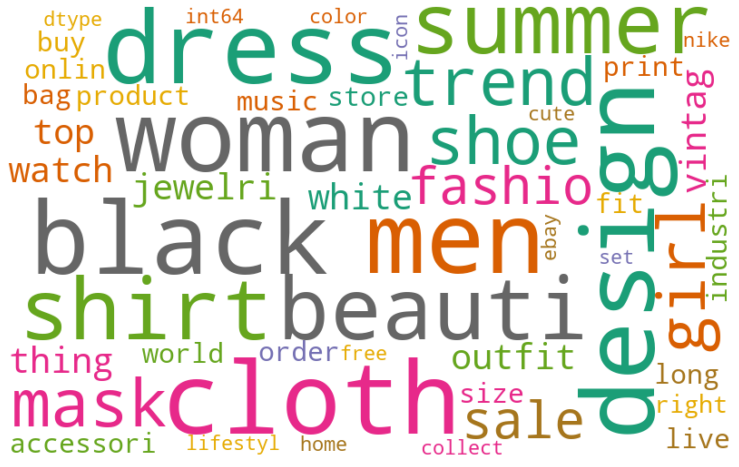

In [103]:
#Wordcloud
wordcloud = WordCloud(stopwords=stop_words,width=800, height=500, random_state=21, max_font_size=110,background_color="white", colormap="Dark2").generate(str(freq_NN)) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_twitter')

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(data_clean['text'])

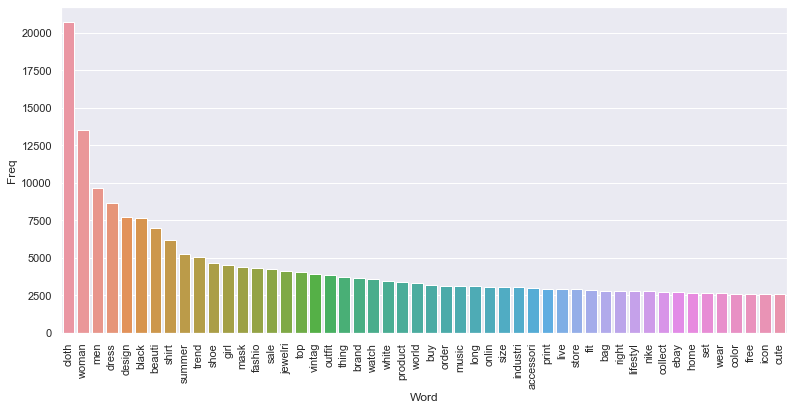

In [121]:
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(data_clean['text'])
    bag_of_words=vec.transform(data_clean['text'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#Creating data frame of most frequent words for creating visualizations

top_words = get_top_n_words(data_clean['text'], n=50)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()
fig.savefig("sns_outputfashiontweet.png")

### CountVectorizer with bigrams

In [106]:
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(data_clean['text'])   #only bigrams
    bag_of_words=vec1.transform(data_clean['text'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [107]:
#Creating data frame of most frequent words for creating visualizations

top2_words = get_top_n2_words(data_clean['text'], n=32)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']


In [108]:
# for bigram wordcloud
top250_words = get_top_n2_words(data_clean['text'], n=250)
top250_df = pd.DataFrame(top250_words)
top250_df.columns = ['Bi-gram', 'Freq']


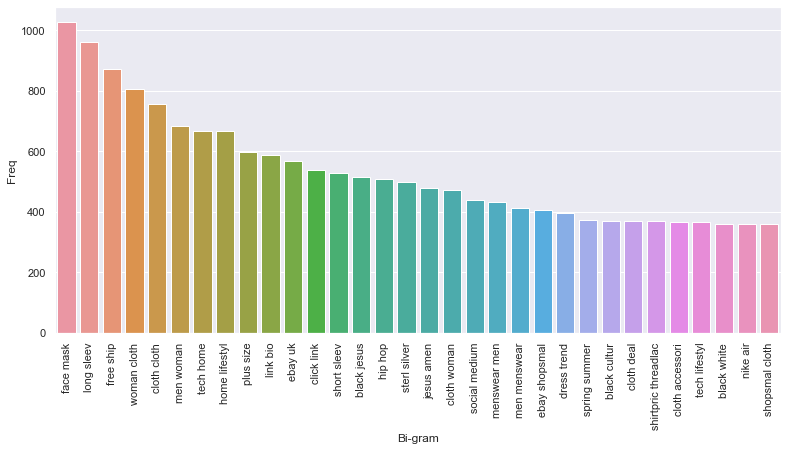

In [114]:
# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
fig = h.get_figure()
fig.savefig("sns_output_bigramsfashiontweet.png")

In [112]:
top250_df['Bi_gram'] = top250_df['Bi-gram'].str.replace(' ','_')
top250_df['Bi_gram']

0          face_mask
1         long_sleev
2          free_ship
3        woman_cloth
4        cloth_cloth
           ...      
245          size_xl
246      ootd_outfit
247    alyssa_milano
248       home_decor
249    etsi_etsyshop
Name: Bi_gram, Length: 250, dtype: object

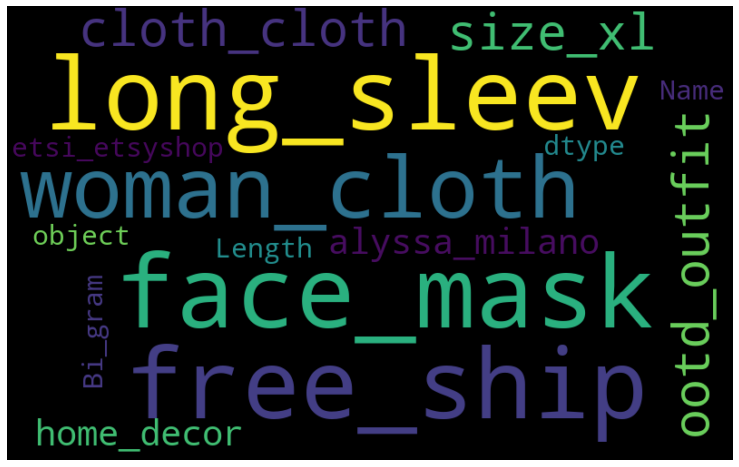

In [113]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top250_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_bigramfashiontweet')

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text


In [39]:
no_features = 100000

In [45]:
def get_top_n2_words(corpus,n=None):
    tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=no_features, ngram_range=(2,2),
                                  analyzer='word')   #only bigrams
    bag_of_words=tfidf_vectorizer.fit_transform(data_clean['text'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in tfidf_vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
top2_words = get_top_n2_words(data_clean['text'], n=32)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']


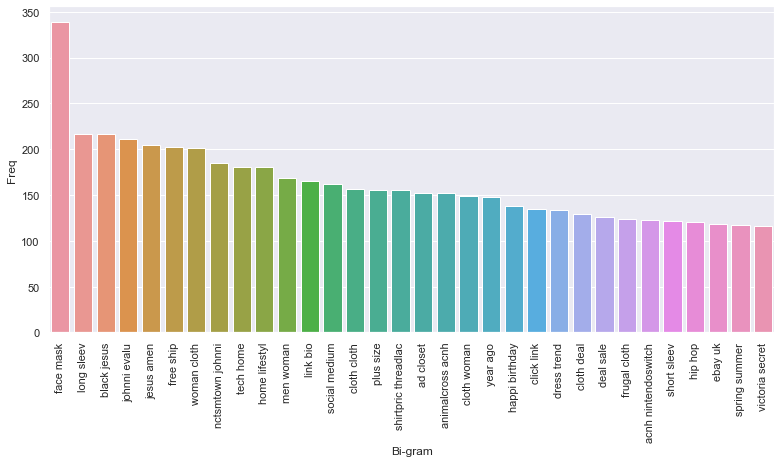

In [47]:
# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
fig = h.get_figure()
fig.savefig("sns_output_bigramsfashiontweet.png")

In [117]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))

Vocabulary has 10000 distinct terms


In [118]:
data_clean.to_pickle("data_cleanfashiontweet.pkl")